In [2]:
import pandas as pd

# Read the CSV file into a pandas DataFrame
file_name = 'Uber-Jan-Feb-FOIL.csv'
df = pd.read_csv(file_name)

# Convert 'date' column to datetime format to handle dates properly
df['datetime'] = pd.to_datetime(df['date'])

# Group by 'datetime' and sum the 'active_vehicles' and 'trips'
summary_df = df.groupby('datetime')[['active_vehicles', 'trips']].sum()

# Sort the summary DataFrame by 'datetime' to ensure chronological order
summary_df = summary_df.sort_index()

# Display the summary DataFrame
(summary_df)


,active_vehicles,trips
datetime,,
2015-01-01,6885,56437
2015-01-02,6330,39189
2015-01-03,6510,58449
2015-01-04,5838,40798
2015-01-05,6884,42752
2015-01-06,7216,52426
2015-01-07,7444,62102
2015-01-08,7999,71413
2015-01-09,7989,70296


In [3]:
import pandas as pd

# Read the NYC weather data CSV file into a pandas DataFrame
nyc_file_name = 'NYC.csv'
nyc_data = pd.read_csv(nyc_file_name)


# Convert the 'datetime' column to datetime format for proper sorting
nyc_data['datetime'] = pd.to_datetime(nyc_data['datetime'])

# Select the relevant columns and organize by datetime
selected_columns = ['datetime', 'tempmax', 'humidity', 'precip', 'windspeed']
organized_nyc_data = nyc_data[selected_columns]

# Sort the DataFrame by datetime to ensure proper chronological order
organized_nyc_data = organized_nyc_data.sort_values(by='datetime')

# Reset index for a clean DataFrame
organized_nyc_data.reset_index(drop=True, inplace=True)

# Display the organized NYC weather DataFrame
("\nOrganized NYC Weather Data:")
(organized_nyc_data)


,datetime,tempmax,humidity,precip,windspeed
0,2015-01-01,3.7,38.7,0.000,23.0
1,2015-01-02,5.7,42.0,0.024,27.4
2,2015-01-03,4.7,70.9,17.008,15.9
3,2015-01-04,13.0,88.5,8.886,27.2
4,2015-01-05,10.0,37.6,0.000,39.3
5,2015-01-06,-5.8,59.1,1.281,19.5
6,2015-01-07,-4.8,50.3,0.000,36.8
7,2015-01-08,-6.6,44.2,0.000,23.5
8,2015-01-09,0.4,49.2,1.759,29.4
9,2015-01-10,-5.0,40.5,0.000,20.7


In [4]:
import pandas as pd

# Assuming summary_df and organized_nyc_data are already defined

# Merge the two DataFrames on 'datetime'
merged_df = pd.merge(summary_df.reset_index(), organized_nyc_data, on='datetime', how='outer')

# Display the merged DataFrame
(merged_df)


,datetime,active_vehicles,trips,tempmax,humidity,precip,windspeed
0,2015-01-01,6885,56437,3.7,38.7,0.000,23.0
1,2015-01-02,6330,39189,5.7,42.0,0.024,27.4
2,2015-01-03,6510,58449,4.7,70.9,17.008,15.9
3,2015-01-04,5838,40798,13.0,88.5,8.886,27.2
4,2015-01-05,6884,42752,10.0,37.6,0.000,39.3
5,2015-01-06,7216,52426,-5.8,59.1,1.281,19.5
6,2015-01-07,7444,62102,-4.8,50.3,0.000,36.8
7,2015-01-08,7999,71413,-6.6,44.2,0.000,23.5
8,2015-01-09,7989,70296,0.4,49.2,1.759,29.4
9,2015-01-10,7346,78484,-5.0,40.5,0.000,20.7


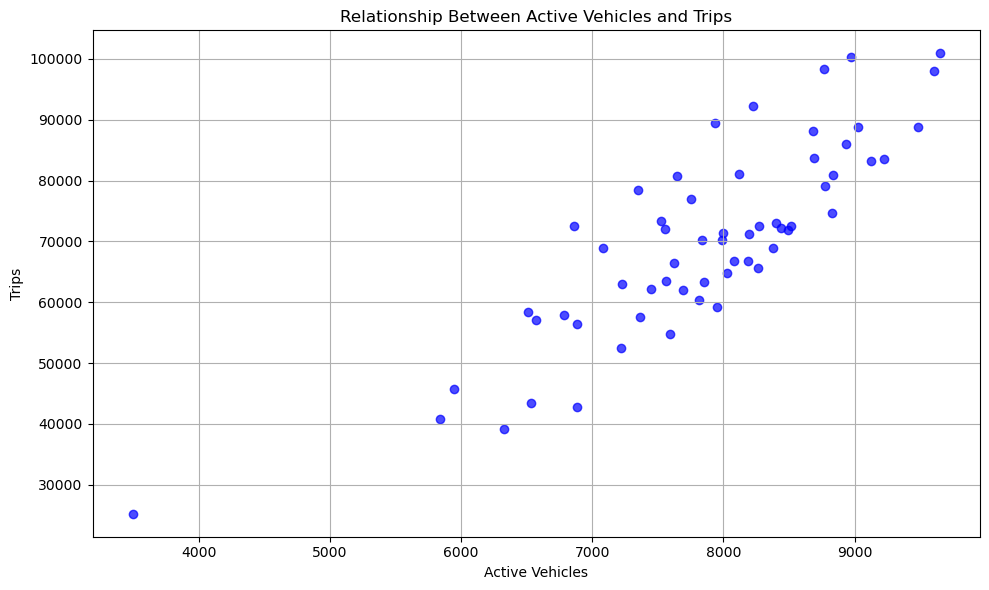

In [5]:
import matplotlib.pyplot as plt

# Basic scatter plot setup
plt.figure(figsize=(10, 6))
plt.scatter(summary_df['active_vehicles'], summary_df['trips'], alpha=0.7, color="blue")

# Add title and labels
plt.title('Relationship Between Active Vehicles and Trips')
plt.xlabel('Active Vehicles')
plt.ylabel('Trips')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


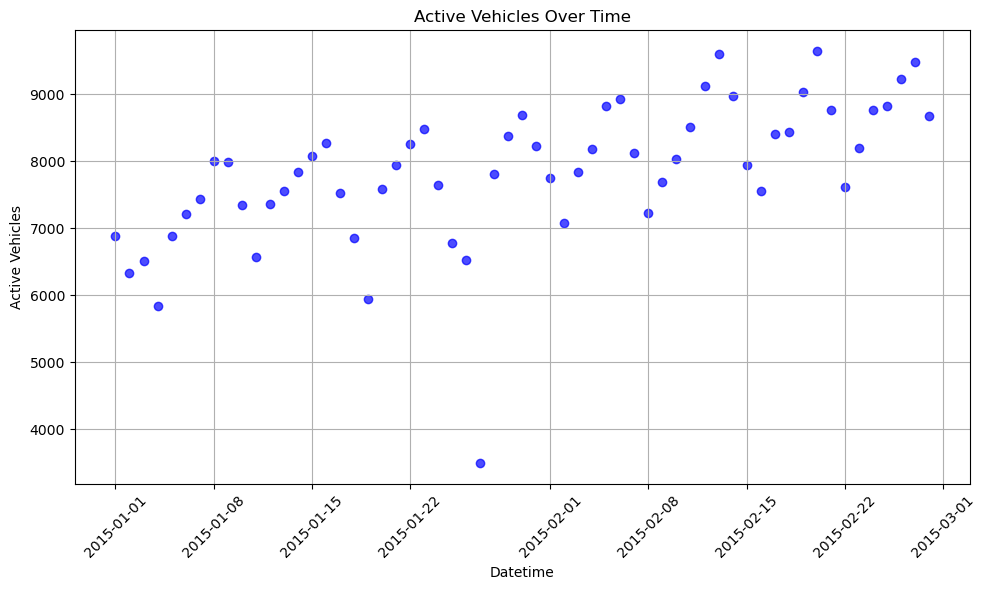

In [6]:
import matplotlib.pyplot as plt

# Convert 'datetime' to datetime format if not already
merged_df['datetime'] = pd.to_datetime(merged_df['datetime'], errors='coerce')

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['datetime'], merged_df['active_vehicles'], alpha=0.7, color="blue")

# Add title and labels
plt.title('Active Vehicles Over Time')
plt.xlabel('Datetime')
plt.ylabel('Active Vehicles')
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.grid(True)
plt.tight_layout()
plt.show()



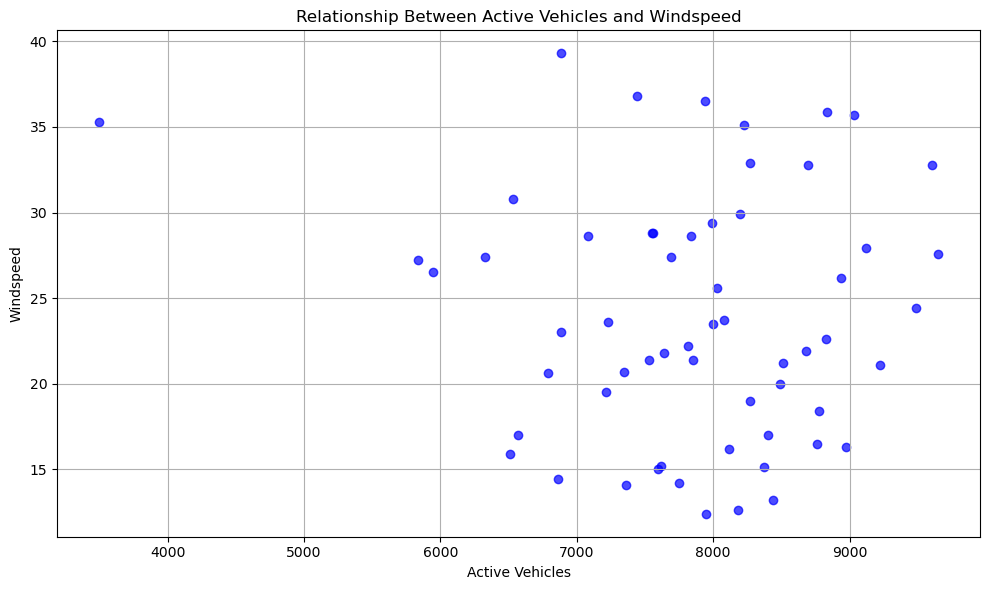

In [7]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['active_vehicles'], merged_df['windspeed'], alpha=0.7, color="blue")

# Add title and labels
plt.title('Relationship Between Active Vehicles and Windspeed')
plt.xlabel('Active Vehicles')
plt.ylabel('Windspeed')
plt.grid(True)
plt.tight_layout()
plt.show()


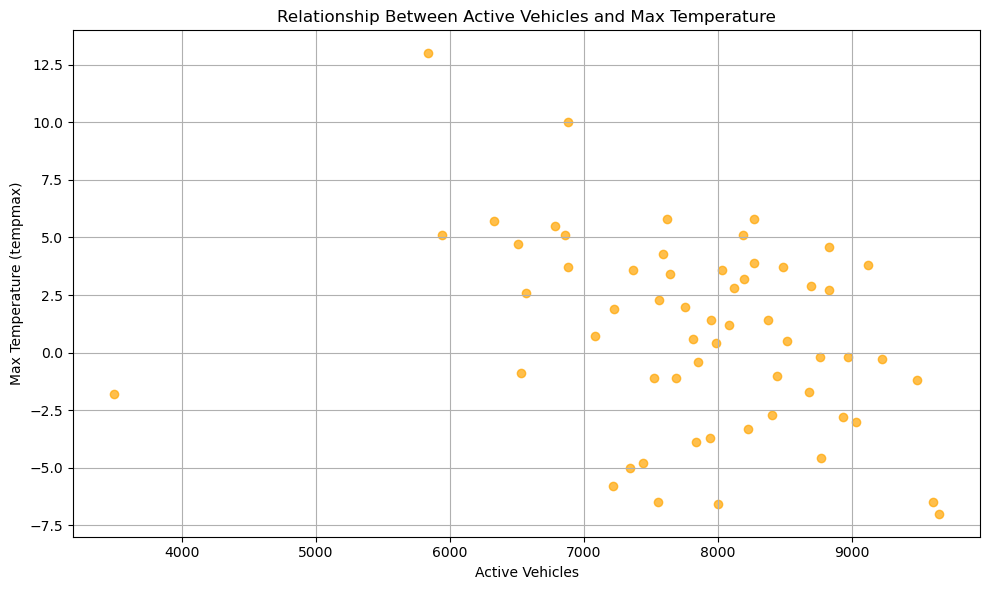

In [8]:
import matplotlib.pyplot as plt

# Plot setup
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['active_vehicles'], merged_df['tempmax'], alpha=0.7, color="orange")

# Add title and labels
plt.title('Relationship Between Active Vehicles and Max Temperature')
plt.xlabel('Active Vehicles')
plt.ylabel('Max Temperature (tempmax)')
plt.grid(True)
plt.tight_layout()
plt.show()


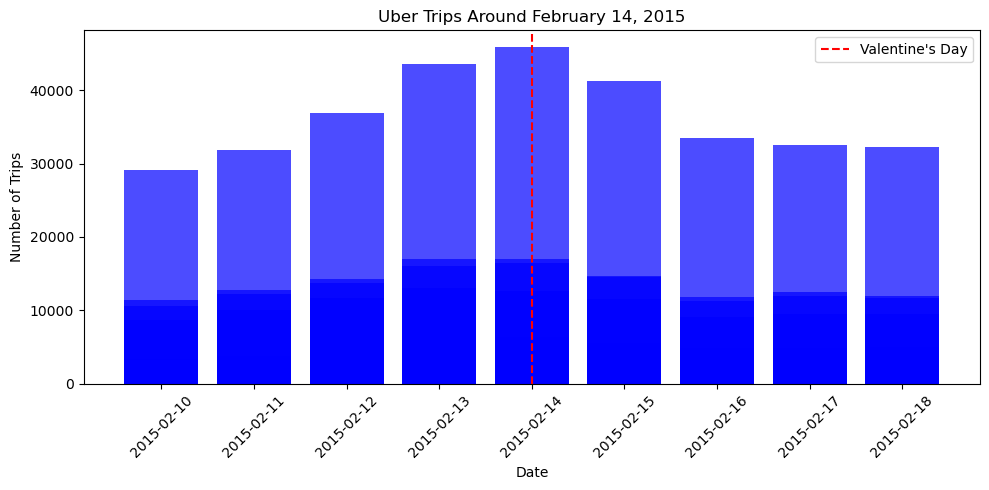

In [9]:
#Oanh, "Uber ride volume around February 14?"
start_date = '2015-02-10'
end_date = '2015-02-18'
filtered_df = df[(df['datetime'] >= start_date) & (df['datetime'] <= end_date)]

plt.figure(figsize=(10, 5))
plt.bar(filtered_df['datetime'], filtered_df['trips'], color='blue', alpha=0.7)
plt.axvline(x=pd.Timestamp('2015-02-14'), color='red', linestyle='--', label='Valentine\'s Day')
plt.title('Uber Trips Around February 14, 2015')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

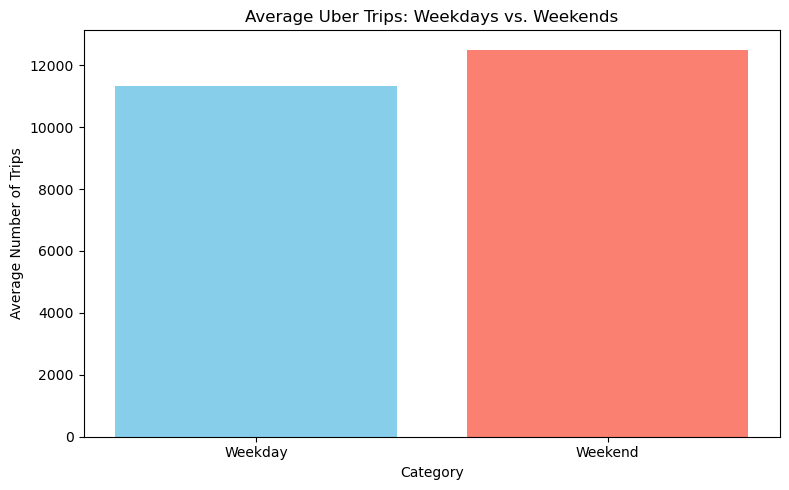

In [10]:
#Oanh, "How do Uber ride volumes change when comparing weekdays vs weekends?"
df['datetime'] = pd.to_datetime(df['datetime'])

df['day_of_week'] = df['datetime'].dt.day_name()

df['category'] = df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

average_trips = df.groupby('category')['trips'].mean().reset_index()

plt.figure(figsize=(8, 5))
plt.bar(average_trips['category'], average_trips['trips'], color=['skyblue', 'salmon'])
plt.title('Average Uber Trips: Weekdays vs. Weekends')
plt.xlabel('Category')
plt.ylabel('Average Number of Trips')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

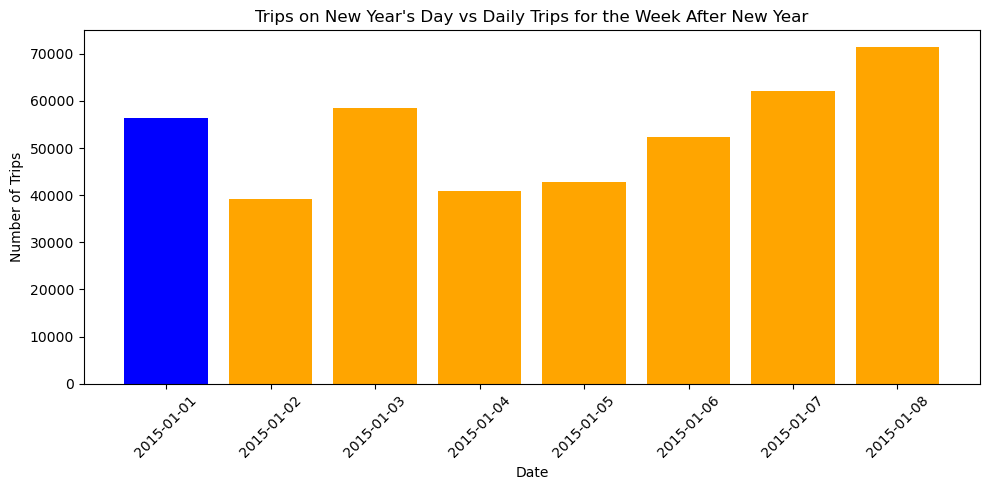

In [11]:
#Oanh, compare the trips on New Year's Day with the trips for each day in the week following New Year's

merged_df['datetime'] = pd.to_datetime(merged_df['datetime'])

new_year_date = '2015-01-01'
trips_new_year = merged_df.loc[merged_df['datetime'] == new_year_date, 'trips'].values[0]

after_new_year_week = merged_df[(merged_df['datetime'] > new_year_date) & (merged_df['datetime'] <= '2015-01-08')]
daily_trips_after_new_year = after_new_year_week[['datetime', 'trips']]

daily_trips_comparison = pd.DataFrame({
    'datetime': [new_year_date],
    'trips': [trips_new_year]
})

comparison_df = pd.concat([daily_trips_comparison, daily_trips_after_new_year], ignore_index=True)

comparison_df['datetime'] = pd.to_datetime(comparison_df['datetime'])
comparison_df.set_index('datetime', inplace=True)

plt.figure(figsize=(10, 5))
plt.bar(comparison_df.index, comparison_df['trips'], color=['blue'] + ['orange'] * (len(comparison_df) - 1))
plt.title('Trips on New Year\'s Day vs Daily Trips for the Week After New Year')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

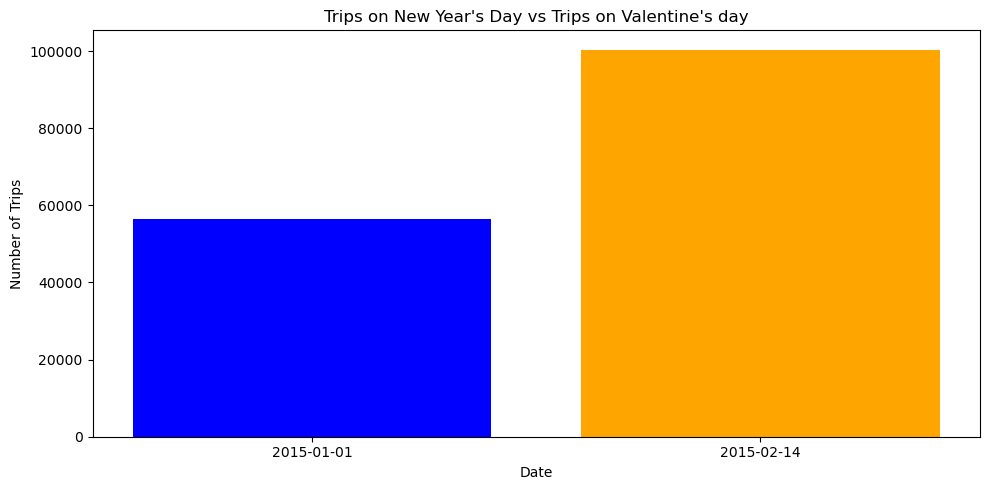

In [12]:
# Rania, compare the trips on New Year's Day with the trips for Valentine’s day

new_year_date = '2015-01-01'
valentine_date = '2015-02-14'

trips_new_year = merged_df.loc[merged_df['datetime'] == new_year_date, 'trips'].values[0]

trips_valentine = merged_df.loc[merged_df['datetime'] == valentine_date, 'trips'].values[0]

new_year_trips_comparison = pd.DataFrame({
    'datetime': [new_year_date],
    'trips': [trips_new_year]
})

valentine_trips_comparison = pd.DataFrame({
    'datetime': [valentine_date],
    'trips': [trips_valentine]
})

comparison_df = pd.concat([new_year_trips_comparison, valentine_trips_comparison], ignore_index=True)

plt.figure(figsize=(10, 5))
plt.bar(comparison_df['datetime'], comparison_df['trips'], color=['blue'] + ['orange'])
plt.title("Trips on New Year's Day vs Trips on Valentine's day")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.xticks()
plt.tight_layout()
plt.show()



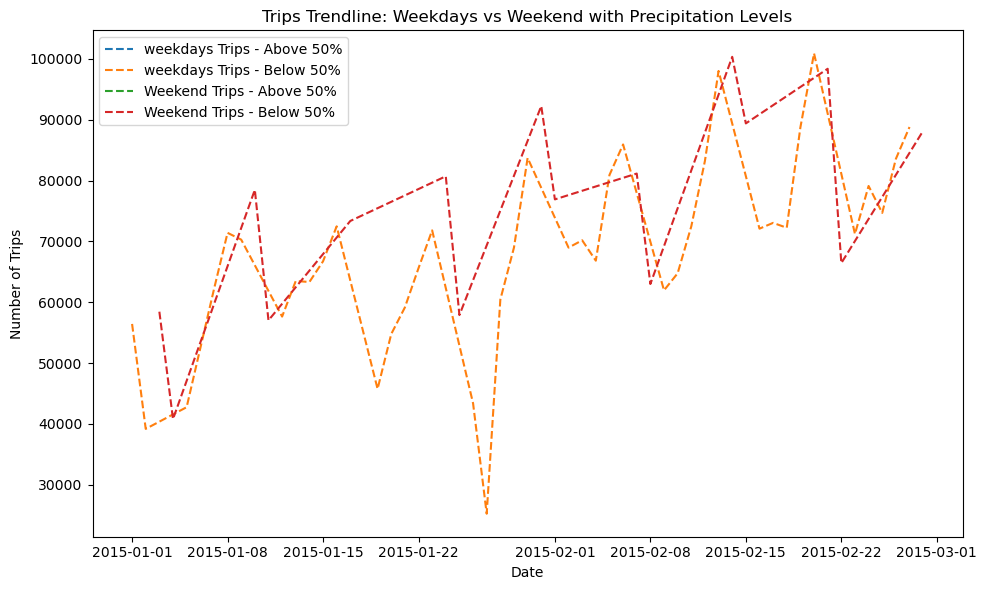

In [14]:

# Rania, trendline of weekdays and weekend trips when precipitation above 50% and below 50%. 


# Create a new column for the day of the week
merged_df['day_of_week'] = merged_df['datetime'].dt.day_name()

# Classify precipitation into above or below 50%
merged_df['precip_level'] = merged_df['precip'].apply(lambda x: 'Above 50%' if x > 50 else 'Below 50%')

# Classify day_of_week into 'Weekday' and 'Weekend'
merged_df['category'] = merged_df['day_of_week'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')

# Plot the data
plt.figure(figsize=(10, 6))

# Plot for weekdays
for precip_level in ['Above 50%', 'Below 50%']:
    filtered_weekdays = merged_df[(merged_df['precip_level'] == precip_level) & (merged_df['category'] == 'Weekday')]
    plt.plot(filtered_weekdays['datetime'], filtered_weekdays['trips'], linestyle='--', label=f'weekdays Trips - {precip_level}')


# Plot for weekends
for precip_level in ['Above 50%', 'Below 50%']:
    filtered_weekends = merged_df[(merged_df['precip_level'] == precip_level) & (merged_df['category'] == 'Weekend')]
    plt.plot(filtered_weekends['datetime'], filtered_weekends['trips'], linestyle='--', label=f'Weekend Trips - {precip_level}')


# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.title('Trips Trendline: Weekdays vs Weekend with Precipitation Levels')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()
